# Astropy I: Introduction

So far we have looked at some interesting features that Python and some of its packages have to offer. We had a glimpse of the power of NumPy and Matplotlib. These are perhaps very versatile packages and find use at a lot of places. 

However, the scope for astronomical data analysis is very vast and is only getting wider with time. Since Python is the  primary programming language that many astronomers prefer, some went on to make packages relevant to astronomy. What if all such packages could be found together under one umbrella? Well, the **Astropy Project** is the answer.

[Astropy](https://www.astropy.org/) is an open-source and community-developed Python package, with the first public version released in [2013](https://www.aanda.org/articles/aa/full_html/2013/10/aa22068-13/aa22068-13.html).

The purpose of Astropy is to provide core astronomy-related functionality to the community, including support for domain-specific file formats such as flexible image transport system (FITS) files, common ASCII table formats, unit and physical quantity conversions, physical constants specific to astronomy, celestial coordinate and time transformations, world coordinate system (WCS) support, generalized containers for representing gridded as well as tabular data, and a framework for cosmological transformations and conversions.

To know more about Astropy, you can check out the latest documentation [here](https://docs.astropy.org/en/stable/).

To begin with, in this tutorial, we shall look at the ease of reading and writing files using `astropy.io`

In [19]:
from astropy.io import ascii

`astropy.io.ascii` offers many methods to read and write  a wide range of ASCII data table formats. You can find a list of all supported formats [here](https://docs.astropy.org/en/stable/io/ascii/). Let us look at the list of galaxies we used in a previous tutorial. 

In [20]:
galaxies = ascii.read('galaxies.csv')

print(galaxies)

mangaid   objra     objdec    redshift 
------- --------- --------- -----------
      1  133.3711 57.598427 0.039515216
      2 133.68567  57.48025 0.041055806
      3 136.01717  57.09233  0.04657103
      4 133.98996 57.677967  0.01435065
      5 136.75137 57.451435 0.046406217
      6 133.33003 57.041157 0.025901696
      7 134.19392 56.786747 0.025738737
      8 132.46565 57.143726  0.03973351
      9 132.91277  57.10742 0.025825359
     10 134.59149 57.684967 0.040748116
    ...       ...       ...         ...
   4646 228.78635 28.384981  0.07847208
   4647 228.45186 28.032959  0.11477131
   4648 226.94357 28.819979  0.11075065
   4649  229.8116 29.340023 0.118073106
   4650 228.73593 28.759752  0.07902077
   4651 227.48119 28.382177 0.058500074
   4652 228.41486 28.244461  0.04607988
   4653  226.9906  28.88186 0.058178358
   4654 228.07332  29.65721  0.06902184
   4655 227.04141 29.222193  0.11129715
   4656 228.17638 27.799559 0.068651415
Length = 4656 rows


In [21]:
ascii.write(galaxies[0:15],format='csv')

mangaid,objra,objdec,redshift
1,133.3711,57.598427,0.039515216
2,133.68567,57.48025,0.041055806
3,136.01717,57.09233,0.04657103
4,133.98996,57.677967,0.01435065
5,136.75137,57.451435,0.046406217
6,133.33003,57.041157,0.025901696
7,134.19392,56.786747,0.025738737
8,132.46565,57.143726,0.03973351
9,132.91277,57.10742,0.025825359
10,134.59149,57.684967,0.040748116
11,134.91046,56.878895,0.031067824
12,137.04114,57.42361,0.11937139
13,132.65399,57.35967,0.026280478
14,134.00812,57.390965,0.040949486
15,136.62372,56.796394,0.06758024


# Introduction to FITS files

The most popular file format used in astronomy, Flexible Image Transport System ([FITS](https://fits.gsfc.nasa.gov/fits_documentation.html)), is a digital file format meant for storage of data: formatted as multi-dimensional arrays (2D for the example we'll look at), or tables. Astropy provides the `astropy.io.fits` package to deal with FITS files efficiently and access information with ease.

Let us begin with first importing this package.

In [22]:
from astropy.io import fits

Let us import some tools for plotting as well, since we would also like to look at the pretty picture hidden in the huge array of numbers.

In [23]:
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

%matplotlib inline

Note that we have also imported `astropy.stats.sigma_clipped_stats`. We shall see why at a later point.

Let us now open the FITS file given.

In [38]:
m3_fits = fits.open('20200411042032-000-RA.fits')
m3_fits.info()

Filename: 20200411042032-000-RA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


We have now read the given FITS file into our variable. `m3_fits.info()` displays a summary of the FITS file in the form of a list of an [HDUList](https://docs.astropy.org/en/stable/io/fits/api/hdulists.html#astropy.io.fits.HDUList), details of which are not important here.

Since we have only one [HDU object](https://docs.astropy.org/en/stable/io/fits/api/hdus.html) (again, details not important), we shall index our variable as `m3_fits[0]` to access the data it contains.

In [39]:
m3_header = m3_fits[0].header
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

The header of a FITS file contains a lot of information about the when and where and how of the image. The image we are using was taken by the [GROWTH-India Telescope](https://sites.google.com/view/growthindia/) located at Hanle in Ladakh. The header tells us all the necessary details about the telescope, the camera, the target being observed, the observing conditions and so on.

We can read out individual keyword values from the header in the following ways.

In [40]:
m3_header['Date']

'2020-04-11T04:21:11.035'

In [41]:
m3_header[3]

4096

It is also possible to update values in the header file if necessary.

In [42]:
m3_header['Date']='April 11th, 2020'

m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

The header keywords often have comments against them to give a short explanation.

In [43]:
m3_header.comments['EXPOSURE']

'exposure length in seconds'

Let us now turn to the most important part of a FITS file - the data it stores. In the case of our example, this data is a 2D array of photon counts detected by the [CCD camera](https://en.wikipedia.org/wiki/Charge-coupled_device#Use_in_astronomy) which we shall soon interpret as a beautiful image of Messier 3.

In [44]:
m3_data = m3_fits[0].data

In [45]:
print(m3_data.shape, m3_data.dtype.name)

(4108, 4096) uint16


We can check the size of the array as well as the type of data it stores. 

We can also update the array with new values (although, why would one want to do that?)

In [46]:
print(m3_data[2020:2030,10:20])

[[516 506 534 491 499 516 491 508 498 488]
 [515 513 516 536 523 522 524 507 510 504]
 [528 497 486 502 471 519 516 481 494 533]
 [520 505 506 508 496 506 494 506 496 514]
 [483 527 515 507 509 497 496 519 513 508]
 [499 523 503 515 520 509 517 529 506 514]
 [508 517 505 495 509 502 514 508 495 519]
 [505 505 505 514 510 520 515 503 508 496]
 [511 494 512 512 505 510 520 491 515 486]
 [505 508 510 519 515 505 534 507 509 499]]


We have finally reached the point where we shall plot our Messier object. However, an image taken using a CCD camera often has some saturated pixels, often due to [cosmic rays](https://en.wikipedia.org/wiki/Cosmic_ray). To eliminate the outliers that result due to saturated pixels, we use the `sigma_clipped_stats` to compute stats for our data and use them in our plotting function.

In [47]:
mean, median, std = sigma_clipped_stats(m3_data)

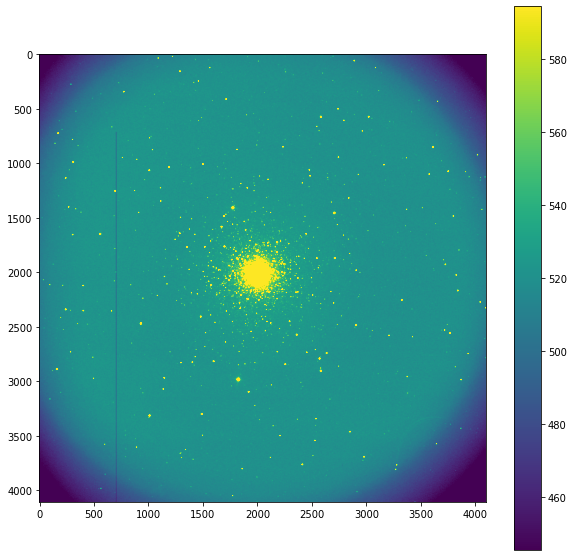

In [48]:
plt.figure(figsize=(10,10))

#set the scale of the image based on its statistics
plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='viridis')
plt.colorbar()

Note that we have used the value 'grey' for the `cmap` parameter. You can try out other colormaps given [here](https://matplotlib.org/tutorials/colors/colormaps.html)